Setup and Import of required Libraries and Datafiles

In [518]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy as sp
import missingno as msno

In [519]:
# Create dataframes from the csv-Files
df_details = pd.read_csv("data/details.csv")
df_sales = pd.read_csv("data/sales.csv")

An Overview of both data sets, their variables & data type, their shape of the data set (number of rows and columns), if we have duplicates in the data frame and the first 10 cases as a good start to get some insights about the data we are looking at.

In [520]:
# Overview about "detail" data set
df_details.info()
df_details.shape # rows 21420, columns 19
df_details.id.nunique() # 21420 distinct elements in column id
df_details.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   bedrooms       21420 non-null  float64
 2   bathrooms      21420 non-null  float64
 3   sqft_living    21420 non-null  float64
 4   sqft_lot       21420 non-null  float64
 5   floors         21420 non-null  float64
 6   waterfront     19060 non-null  float64
 7   view           21357 non-null  float64
 8   condition      21420 non-null  int64  
 9   grade          21420 non-null  int64  
 10  sqft_above     21420 non-null  float64
 11  sqft_basement  20969 non-null  float64
 12  yr_built       21420 non-null  int64  
 13  yr_renovated   17609 non-null  float64
 14  zipcode        21420 non-null  int64  
 15  lat            21420 non-null  float64
 16  long           21420 non-null  float64
 17  sqft_living15  21420 non-null  float64
 18  sqft_l

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0     1000102       6.0       3.00       2400.0    9373.0     2.0         NaN   
1   100100050       3.0       1.00       1320.0   11090.0     1.0         0.0   
2  1001200035       3.0       1.00       1350.0    7973.0     1.5         NaN   
3  1001200050       4.0       1.50       1260.0    7248.0     1.5         NaN   
4  1003000175       3.0       1.00        980.0    7606.0     1.0         0.0   
5   100300280       3.0       2.25       1430.0    4777.0     2.0         0.0   
6   100300500       3.0       2.50       1520.0    3041.0     2.0         0.0   
7   100300530       3.0       2.50       1520.0    3003.0     2.0         0.0   
8  1003400155       3.0       1.00       1100.0    7657.0     1.0         0.0   
9  1003400245       3.0       1.00       1130.0    9907.0     1.0         0.0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0   0.0          3      7      2400.0            0.0      1991           0.0   
1   0.0          3      7      1320.0            0.0      1955           0.0   
2   0.0          3      7      1350.0            0.0      1954           0.0   
3   0.0          5      7      1260.0            0.0      1955           NaN   
4   0.0          3      7       980.0            0.0      1954           0.0   
5   0.0          3      7      1430.0            0.0      2010           0.0   
6   0.0          3      7      1520.0            0.0      2009           NaN   
7   0.0          3      7      1520.0            0.0      2009           0.0   
8   0.0          3      7      1100.0            0.0      1955           0.0   
9   0.0          3      7      1130.0            0.0      1954           0.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98002  47.3262 -122.214         2060.0      7316.0  
1    98155  47.7748 -122.304         1320.0      8319.0  
2    98188  47.4323 -122.292         1310.0      7491.0  
3    98188  47.4330 -122.292         1300.0      7732.0  
4    98188  47.4356 -122.290          980.0      8125.0  
5    98059  47.4867 -122.152         1639.0      3854.0  
6    98059  47.4874 -122.152         1820.0      3229.0  
7    98059  47.4876 -122.153         1820.0      3030.0  
8    98188  47.4374 -122.285         1300.0      8000.0  
9    98188  47.4362 -122.286         1320.0      9907.0

In [521]:
# Overview about "sales" data set
df_sales.head(10)
df_sales.describe()
df_sales.shape # rows 21597, columns 4
df_sales.house_id.nunique()  # 21420 distinct elements in column house_id
df_sales.head(10)

date      price    house_id  id
0  2014-10-13   221900.0  7129300520   1
1  2014-12-09   538000.0  6414100192   2
2  2015-02-25   180000.0  5631500400   3
3  2014-12-09   604000.0  2487200875   4
4  2015-02-18   510000.0  1954400510   5
5  2014-05-12  1230000.0  7237550310   6
6  2014-06-27   257500.0  1321400060   7
7  2015-01-15   291850.0  2008000270   8
8  2015-04-15   229500.0  2414600126   9
9  2015-03-12   323000.0  3793500160  10

To use all information in once we need to merge both data sets: Here we call it the Brutto Data Frame.

In [522]:
# Merge both Datasets to one Brutto Data Frame
df_brutto = pd.merge(df_sales, df_details, how='left', left_on=['house_id'], right_on=['id'], indicator=True)
df_brutto._merge.value_counts() # both 21597

_merge
both          21597
left_only         0
right_only        0
Name: count, dtype: int64

Just to check everthing went well, a quick overview of our new "Brutto" data set. And also again, if any duplicates are generated.

In [523]:
# Brutto Data Set Overview
df_brutto.head()
df_brutto.shape # 21597, 23
df_brutto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   date           21597 non-null  object  
 1   price          21597 non-null  float64 
 2   house_id       21597 non-null  int64   
 3   id_x           21597 non-null  int64   
 4   id_y           21597 non-null  int64   
 5   bedrooms       21597 non-null  float64 
 6   bathrooms      21597 non-null  float64 
 7   sqft_living    21597 non-null  float64 
 8   sqft_lot       21597 non-null  float64 
 9   floors         21597 non-null  float64 
 10  waterfront     19206 non-null  float64 
 11  view           21534 non-null  float64 
 12  condition      21597 non-null  int64   
 13  grade          21597 non-null  int64   
 14  sqft_above     21597 non-null  float64 
 15  sqft_basement  21145 non-null  float64 
 16  yr_built       21597 non-null  int64   
 17  yr_renovated   17749 non-null  

In [524]:
# check how many duplicated rows exist in the data frame
df_brutto.duplicated().value_counts() # no duplicates

False    21597
Name: count, dtype: int64

To explore the data I looked at the following three hypothesis:
H1: Waterfront and price: If the house is at the waterfront, then the price will be higher because of a greater demand.
H2: Own and neighbor lot: If the footage of the lot is big, then the lots in the neighborhood will also be big.
H3: Season and price: If you buy the house in a colder season, then the price will be lower because nobody is in the mood to look at houses.

For a quick insight about the distribution of all our variables, we display descriptives: n, mean, std, min, quartiles and max.

In [525]:
# First Insight via Descriptives
df_brutto.describe()

price      house_id          id_x          id_y      bedrooms  \
count  2.159700e+04  2.159700e+04  21597.000000  2.159700e+04  21597.000000   
mean   5.402966e+05  4.580474e+09  10799.000000  4.580474e+09      3.373200   
std    3.673681e+05  2.876736e+09   6234.661218  2.876736e+09      0.926299   
min    7.800000e+04  1.000102e+06      1.000000  1.000102e+06      1.000000   
25%    3.220000e+05  2.123049e+09   5400.000000  2.123049e+09      3.000000   
50%    4.500000e+05  3.904930e+09  10799.000000  3.904930e+09      3.000000   
75%    6.450000e+05  7.308900e+09  16198.000000  7.308900e+09      4.000000   
max    7.700000e+06  9.900000e+09  21597.000000  9.900000e+09     33.000000   

          bathrooms   sqft_living      sqft_lot        floors    waterfront  \
count  21597.000000  21597.000000  2.159700e+04  21597.000000  19206.000000   
mean       2.115826   2080.321850  1.509941e+04      1.494096      0.007602   
std        0.768984    918.106125  4.141264e+04      0.539683      0.086858   
min        0.500000    370.000000  5.200000e+02      1.000000      0.000000   
25%        1.750000   1430.000000  5.040000e+03      1.000000      0.000000   
50%        2.250000   1910.000000  7.618000e+03      1.500000      0.000000   
75%        2.500000   2550.000000  1.068500e+04      2.000000      0.000000   
max        8.000000  13540.000000  1.651359e+06      3.500000      1.000000   

       ...         grade    sqft_above  sqft_basement      yr_built  \
count  ...  21597.000000  21597.000000   21145.000000  21597.000000   
mean   ...      7.657915   1788.596842     291.857224   1970.999676   
std    ...      1.173200    827.759761     442.490863     29.375234   
min    ...      3.000000    370.000000       0.000000   1900.000000   
25%    ...      7.000000   1190.000000       0.000000   1951.000000   
50%    ...      7.000000   1560.000000       0.000000   1975.000000   
75%    ...      8.000000   2210.000000     560.000000   1997.000000   
max    ...     13.000000   9410.000000    4820.000000   2015.000000   

       yr_renovated       zipcode           lat          long  sqft_living15  \
count  17749.000000  21597.000000  21597.000000  21597.000000   21597.000000   
mean     836.650516  98077.951845     47.560093   -122.213983    1986.620318   
std     4000.110554     53.513072      0.138552      0.140724     685.230472   
min        0.000000  98001.000000     47.155900   -122.519000     399.000000   
25%        0.000000  98033.000000     47.471100   -122.328000    1490.000000   
50%        0.000000  98065.000000     47.571800   -122.231000    1840.000000   
75%        0.000000  98118.000000     47.678000   -122.125000    2360.000000   
max    20150.000000  98199.000000     47.777600   -121.315000    6210.000000   

          sqft_lot15  
count   21597.000000  
mean    12758.283512  
std     27274.441950  
min       651.000000  
25%      5100.000000  
50%      7620.000000  
75%     10083.000000  
max    871200.000000  

[8 rows x 22 columns]

Some of the variables need to be modified:
- the variable "price_1000" is equivalent to "price", just divided by 1000 to demonstrate it with three 0 digits fewer in the end (1,000 v.s 1,000,000 )
- the "date" variable is converted to the datetime format YEAR-MM-DD

In [526]:
# Add Variable Price in 1000'set
df_brutto['price_1000'] = df_brutto['price']/1000

In [527]:
# Convert "date" dtype to datetime with format %Y/%m/%d
df_brutto['date'] = pd.to_datetime(df_brutto['date'], format='%Y-%m-%d')
df_brutto['date'].info() # datetime64[ns]

<class 'pandas.core.series.Series'>
RangeIndex: 21597 entries, 0 to 21596
Series name: date
Non-Null Count  Dtype         
--------------  -----         
21597 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 168.9 KB


Missing Values identification routines:
1. Count how many cases are missing per Column
2. Overview in a matrix for all variables
3. percentage of missings

In [528]:
# display number of missing values per column
df_brutto.isna().sum() # waterfront 2391, view 63, sqft_basement 452, yr_renovated 3848

date                0
price               0
house_id            0
id_x                0
id_y                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
_merge              0
price_1000          0
dtype: int64

<Axes: >

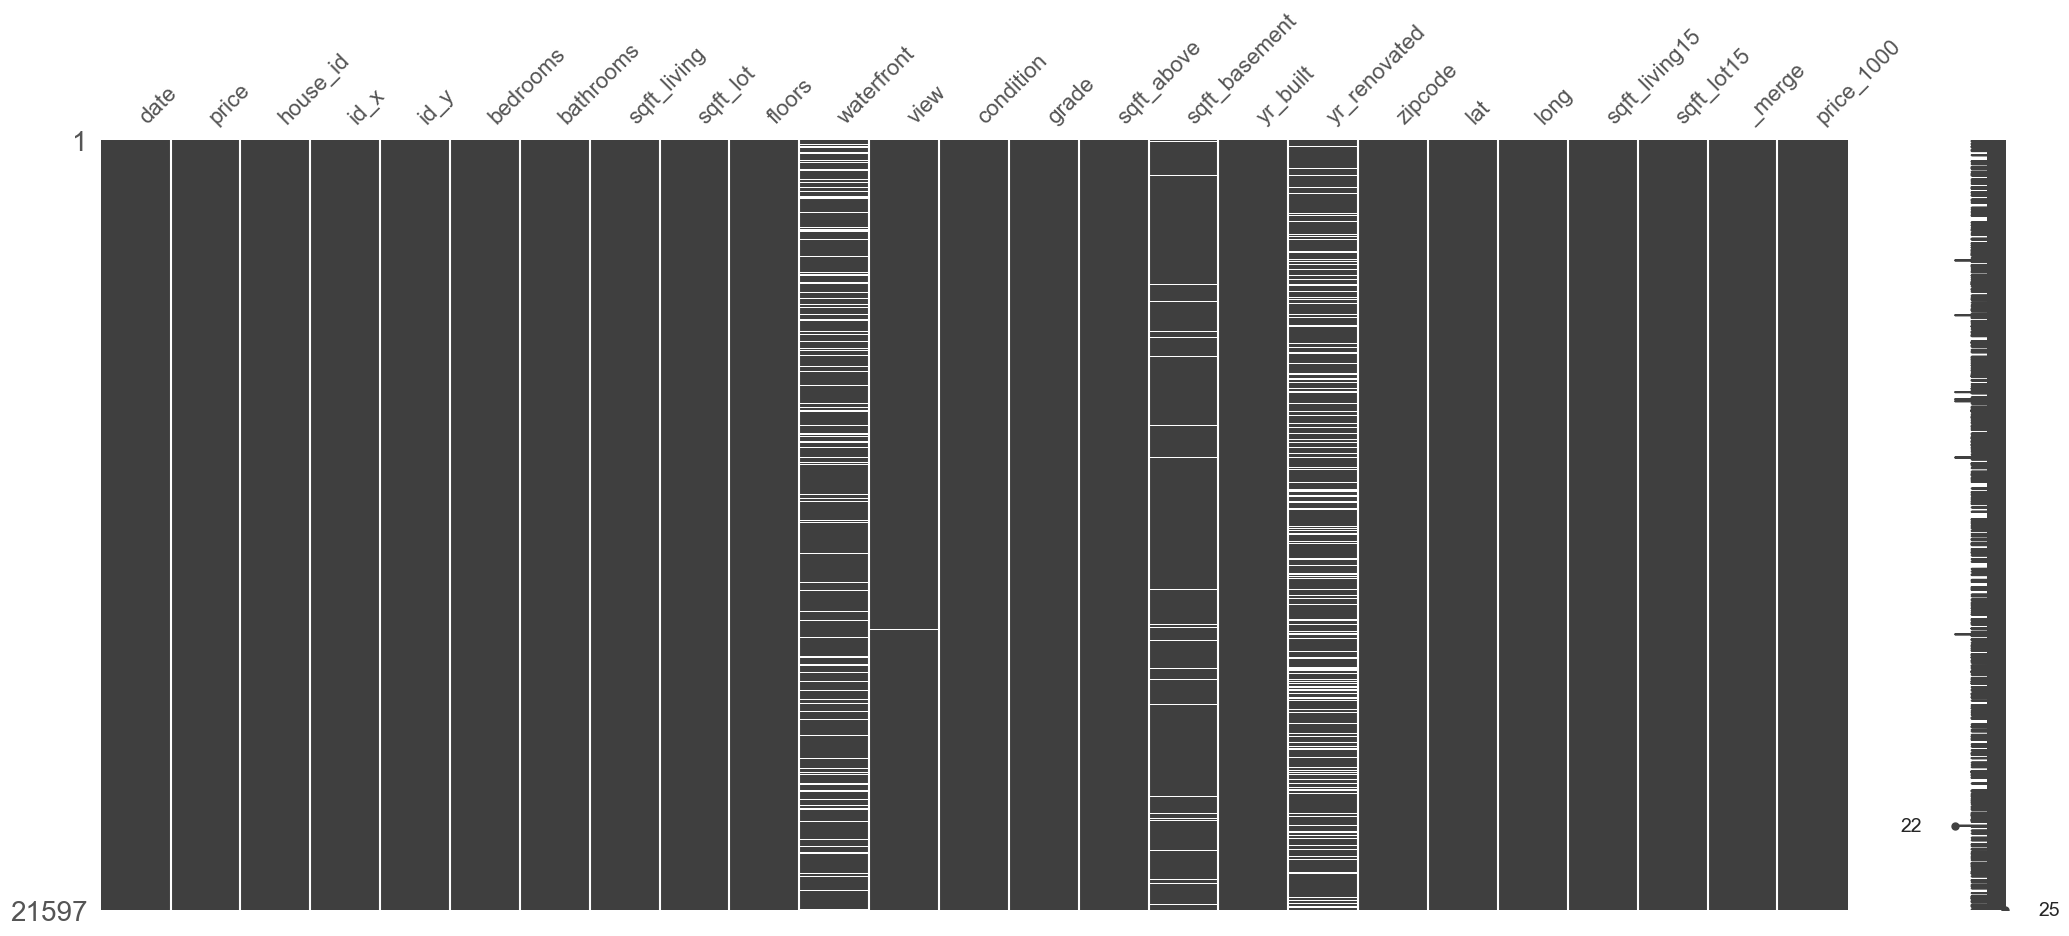

In [529]:
# Missing Values in a matrix
msno.matrix(df_brutto)

In [530]:
# Percentage of missings
print(f"numbers of rows : {df_brutto.shape[0]}")
print(f"missing values in waterfront : {round(df_brutto.waterfront.isna().sum()/df_brutto.shape[0]*100,2)} %")
print(f"missing values in view : {round(df_brutto.view.isna().sum()/df_brutto.shape[0]*100,2)} %")
print(f"missing values in sqft_basement : {round(df_brutto.sqft_basement.isna().sum()/df_brutto.shape[0]*100,2)} %")
print(f"missing values in yr_renovated : {round(df_brutto.yr_renovated.isna().sum()/df_brutto.shape[0]*100,2)} %")
print(f"missing values in complete data frame : {round(df_brutto.isna().sum().sum()/(df_brutto.shape[0]*df_brutto.shape[1])*100,2)} %")

numbers of rows : 21597
missing values in waterfront : 11.07 %
missing values in view : 0.29 %
missing values in sqft_basement : 2.09 %
missing values in yr_renovated : 17.82 %
missing values in complete data frame : 1.25 %


We are interested in the missings to indicate if houses are at waterfront or not.

The year of renovation, the basement size and and view is not really of our interest, since the hypothesis are of other concern. Imputation of missing values do not add value at this stage. 

For now, we copy our original waterfront variable, just to have a backup for later and to differentiate it from the new variable: "Waterfront" (with capital W) which includes now string values if a house is at the waterfront "Yes", it is not "No" or it has a missing values "No Info". 

In [531]:
# Create copy of original waterfront variable
df_brutto['waterfront_copy'] = df_brutto['waterfront']

# Create a string variable with missing value assignment out of waterfront
wf_dict = {0: "No", 1: "Yes"}
df_brutto['Waterfront'] = df_brutto.apply(lambda x: wf_dict.get(x['waterfront'], 'No Info'), axis=1)

Since our focus is on the houses which are at the waterfront, we first have a closer look at the number of cases.

In [532]:
# number of houses in the dataset at the waterfront
df_brutto.groupby('Waterfront').count() # 146

date  price  house_id   id_x   id_y  bedrooms  bathrooms  \
Waterfront                                                              
No          19060  19060     19060  19060  19060     19060      19060   
No Info      2391   2391      2391   2391   2391      2391       2391   
Yes           146    146       146    146    146       146        146   

            sqft_living  sqft_lot  floors  ...  yr_built  yr_renovated  \
Waterfront                                 ...                           
No                19060     19060   19060  ...     19060         15671   
No Info            2391      2391    2391  ...      2391          1957   
Yes                 146       146     146  ...       146           121   

            zipcode    lat   long  sqft_living15  sqft_lot15  _merge  \
Waterfront                                                             
No            19060  19060  19060          19060       19060   19060   
No Info        2391   2391   2391           2391        2391    2391   
Yes             146    146    146            146         146     146   

            price_1000  waterfront_copy  
Waterfront                               
No               19060            19060  
No Info           2391                0  
Yes                146              146  

[3 rows x 26 columns]

To make the data frame a little bit smaller, we drop unnecessary variables from the merging process and also the old waterfront variable: id_x, id_y, _merge, waterfront

In [533]:
# Drop unnecessary columns (id_x, id_y, _merge)
df_brutto = df_brutto.drop(['id_x', 'id_y', '_merge', 'waterfront'], axis=1)
df_brutto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             21597 non-null  datetime64[ns]
 1   price            21597 non-null  float64       
 2   house_id         21597 non-null  int64         
 3   bedrooms         21597 non-null  float64       
 4   bathrooms        21597 non-null  float64       
 5   sqft_living      21597 non-null  float64       
 6   sqft_lot         21597 non-null  float64       
 7   floors           21597 non-null  float64       
 8   view             21534 non-null  float64       
 9   condition        21597 non-null  int64         
 10  grade            21597 non-null  int64         
 11  sqft_above       21597 non-null  float64       
 12  sqft_basement    21145 non-null  float64       
 13  yr_built         21597 non-null  int64         
 14  yr_renovated     17749 non-null  float

Data Overview via Geo Plotting. We check for all houses in the data set and differentiate between waterfront houses and not, or if they are missing.
Hovering over the dots which indicate properties, we can get some infos: waterfront, location, price, view, bedrooms and grade.

In [534]:
# Street map of houses at waterfront in Washington State via plotly express (Continuous with missing)                          
fig = px.scatter_mapbox(df_brutto,
                        mapbox_style="open-street-map",
                        lat="lat", lon="long", 
                        color='Waterfront', 
                        zoom=9, 
                        width=1000, 
                        height=700,
                        hover_data=["price", "view", "bedrooms", "grade"])
# fig.update_layout(color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(margin={"r":10,"t":10,"l":10,"b":10})
fig.show()

Houses defined as located at the waterfront, are really at the waterfront. No "second row" houses included. The geographical overview gives us a good insight, that most of the missing values for the variable waterfront are not at the waterfront. In the next step we have a look what view indicates and if it helps us to impute missings for the waterfront variable.

In [535]:
# Street map of houses regarding the view scale in Washington via plotly express
fig = px.scatter_mapbox(df_brutto, 
                        lat="lat", 
                        lon="long", 
                        color="view", 
                        zoom=9, 
                        width=1000, 
                        height=700, 
                        hover_data="Waterfront")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":10,"t":10,"l":10,"b":10})
fig.show()

We got the idea, that a higher score in "view" might be helpful in idenfying missings at the waterfront. But the geo plot also show, that it indicates areas which are not at the water (for example hills or houses close to the water but second row). To check again on counts, a crosstable will give us a better overview:

In [536]:
# Data exploration to check if a high rating of view also indicates waterfront
# np.corrcoef(df_brutto["waterfront_copy"], df_brutto["view"])
df_brutto.waterfront_copy.corr(df_brutto.view) # r= 0.417
pd.crosstab(index=df_brutto['Waterfront'], columns=df_brutto['view'])

view          0.0  1.0  2.0  3.0  4.0
Waterfront                           
No          17300  290  828  420  166
No Info      2122   39  122   74   28
Yes             0    1    7   14  123

Waterfront houses mostly have a view of 4, some fewer have a 3. The igorable rest has a 2 or 1 view rating. However: In the next step we display in a geographical overview all cases with no info for the "waterfront" variable but a view rating of 3 or 4. That will help us identify missing cases, which we can enrich with the value if it is at waterfront or not.

In [537]:
# Create Data Frame with Cases with waterfront missings and a view scale of three or greater
df_wf_vw = df_brutto[(df_brutto.view >= 3) & (df_brutto.waterfront_copy.isna())]

In [538]:
# Street map of houses with missing value for waterfront and view 3 or 4
fig = px.scatter_mapbox(df_wf_vw, 
                        lat="lat", 
                        lon="long", 
                        zoom=9, 
                        width=1000, 
                        height=700, 
                        hover_data=["view", "Waterfront", "house_id"])
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":10,"t":10,"l":10,"b":10})
fig.show()

A higher scale of view (3,4) is not a good "automatic" approximation if we are looking for waterfront houses. There is too many houses, which are not close to the water or second row with a good view and a missing for waterfront. So I chose by visual support on the map some houses (by id) which I am convinced, can called a first row waterfront house. To do so I created a list with those IDs and edited the info for thos 9 cases in the "Waterfront" variable.

In [539]:
# list of ids with missing for waterfront, view rating of 3 or 4 and close to the shore (selected by map)
list_wf_mis = [8550001515 , 1822039138 , 5215200010, 6102400166,3577000116, 2726049034, 825059178, 2579500110, 920130020, 1724069060]
list_wf_mis

[8550001515,
 1822039138,
 5215200010,
 6102400166,
 3577000116,
 2726049034,
 825059178,
 2579500110,
 920130020,
 1724069060]

In [540]:
# list of rows of house_id's from list (see above)
df_brutto[df_brutto.house_id.isin(list_wf_mis)]

date      price    house_id  bedrooms  bathrooms  sqft_living  \
3825  2014-10-01   429592.0  8550001515       2.0       2.75       1992.0   
5929  2014-06-26   663000.0  5215200010       3.0       2.50       2480.0   
8969  2015-05-07  1080000.0  1724069060       2.0       3.25       1550.0   
10327 2015-03-25   680000.0  3577000116       4.0       1.00       2200.0   
13299 2015-02-27   600000.0  1822039138       2.0       2.25       2320.0   
13953 2014-09-05   649000.0  6102400166       3.0       2.00       1810.0   
15025 2014-11-10  2000000.0  2726049034       3.0       3.25       2610.0   
16803 2014-09-23  2570000.0   825059178       4.0       3.75       4475.0   
18194 2014-07-01  2370000.0  2579500110       3.0       2.25       3530.0   

       sqft_lot  floors  view  condition  ...  yr_built  yr_renovated  \
3825    10946.0     1.5   4.0          5  ...      1903           0.0   
5929    37843.0     1.5   3.0          4  ...      1974           NaN   
8969     1767.0     3.0   3.0          3  ...      2006           0.0   
10327   12137.0     1.0   4.0          4  ...      1956           0.0   
13299   18919.0     2.0   4.0          4  ...      1976           0.0   
13953   17006.0     2.0   4.0          3  ...      1913       19870.0   
15025   16387.0     2.0   4.0          3  ...      2006           0.0   
16803   20424.0     2.0   4.0          3  ...      1999           NaN   
18194   17450.0     1.0   3.0          3  ...      1930       19930.0   

       zipcode      lat     long  sqft_living15  sqft_lot15  price_1000  \
3825     98070  47.3551 -122.475         1110.0      8328.0     429.592   
5929     98070  47.4003 -122.422         2350.0     42122.0     663.000   
8969     98075  47.5684 -122.060         2710.0      3444.0    1080.000   
10327    98028  47.7473 -122.261         3250.0     17153.0     680.000   
13299    98070  47.3905 -122.462         1610.0     18919.0     600.000   
13953    98166  47.4663 -122.369         2180.0     24911.0     649.000   
15025    98125  47.7175 -122.278         2590.0     12958.0    2000.000   
16803    98033  47.6646 -122.208         4340.0      5250.0    2570.000   
18194    98040  47.5358 -122.213         3530.0     17310.0    2370.000   

       waterfront_copy  Waterfront  
3825               NaN     No Info  
5929               NaN     No Info  
8969               NaN     No Info  
10327              NaN     No Info  
13299              NaN     No Info  
13953              NaN     No Info  
15025              NaN     No Info  
16803              NaN     No Info  
18194              NaN     No Info  

[9 rows x 23 columns]

In [541]:
# replace missing value of waterfront house (for str and int variables) if selected over house_id (n=9)
df_brutto.loc[df_nico['house_id'].isin(list_wf_mis), 'Waterfront'] = "Yes"
df_brutto.loc[df_nico['house_id'].isin(list_wf_mis), 'waterfront_copy'] = 1
df_brutto[df_nico.house_id.isin(list_wf_mis)]

date      price    house_id  bedrooms  bathrooms  sqft_living  \
3825  2014-10-01   429592.0  8550001515       2.0       2.75       1992.0   
5929  2014-06-26   663000.0  5215200010       3.0       2.50       2480.0   
8969  2015-05-07  1080000.0  1724069060       2.0       3.25       1550.0   
10327 2015-03-25   680000.0  3577000116       4.0       1.00       2200.0   
13299 2015-02-27   600000.0  1822039138       2.0       2.25       2320.0   
13953 2014-09-05   649000.0  6102400166       3.0       2.00       1810.0   
15025 2014-11-10  2000000.0  2726049034       3.0       3.25       2610.0   
16803 2014-09-23  2570000.0   825059178       4.0       3.75       4475.0   
18194 2014-07-01  2370000.0  2579500110       3.0       2.25       3530.0   

       sqft_lot  floors  view  condition  ...  yr_built  yr_renovated  \
3825    10946.0     1.5   4.0          5  ...      1903           0.0   
5929    37843.0     1.5   3.0          4  ...      1974           NaN   
8969     1767.0     3.0   3.0          3  ...      2006           0.0   
10327   12137.0     1.0   4.0          4  ...      1956           0.0   
13299   18919.0     2.0   4.0          4  ...      1976           0.0   
13953   17006.0     2.0   4.0          3  ...      1913       19870.0   
15025   16387.0     2.0   4.0          3  ...      2006           0.0   
16803   20424.0     2.0   4.0          3  ...      1999           NaN   
18194   17450.0     1.0   3.0          3  ...      1930       19930.0   

       zipcode      lat     long  sqft_living15  sqft_lot15  price_1000  \
3825     98070  47.3551 -122.475         1110.0      8328.0     429.592   
5929     98070  47.4003 -122.422         2350.0     42122.0     663.000   
8969     98075  47.5684 -122.060         2710.0      3444.0    1080.000   
10327    98028  47.7473 -122.261         3250.0     17153.0     680.000   
13299    98070  47.3905 -122.462         1610.0     18919.0     600.000   
13953    98166  47.4663 -122.369         2180.0     24911.0     649.000   
15025    98125  47.7175 -122.278         2590.0     12958.0    2000.000   
16803    98033  47.6646 -122.208         4340.0      5250.0    2570.000   
18194    98040  47.5358 -122.213         3530.0     17310.0    2370.000   

       waterfront_copy  Waterfront  
3825               1.0         Yes  
5929               1.0         Yes  
8969               1.0         Yes  
10327              1.0         Yes  
13299              1.0         Yes  
13953              1.0         Yes  
15025              1.0         Yes  
16803              1.0         Yes  
18194              1.0         Yes  

[9 rows x 23 columns]

Check with an overview of the Waterfront Variable and Column counts, if the missing transformation worked.

In [542]:
# number of houses in the dataset at the waterfront
df_brutto.groupby('Waterfront').count() # 155

date  price  house_id  bedrooms  bathrooms  sqft_living  \
Waterfront                                                             
No          19060  19060     19060     19060      19060        19060   
No Info      2382   2382      2382      2382       2382         2382   
Yes           155    155       155       155        155          155   

            sqft_lot  floors   view  condition  ...  sqft_basement  yr_built  \
Waterfront                                      ...                            
No             19060   19060  19004      19060  ...          18649     19060   
No Info         2382    2382   2376       2382  ...           2346      2382   
Yes              155     155    154        155  ...            150       155   

            yr_renovated  zipcode    lat   long  sqft_living15  sqft_lot15  \
Waterfront                                                                   
No                 15671    19060  19060  19060          19060       19060   
No Info             1950     2382   2382   2382           2382        2382   
Yes                  128      155    155    155            155         155   

            price_1000  waterfront_copy  
Waterfront                               
No               19060            19060  
No Info           2382                0  
Yes                155              155  

[3 rows x 22 columns]

To get a better understanding about the differences between waterfront and other, I created a table which shows the means of some dependant house characteristics. After that I focus on the price between waterfront houses, others and missings.

In [543]:
# Pivot Tables for insights
# not of major importance: sqft_above, sqft_basement, yr_renovated, sqft_living15, sqft_lot15
pd.pivot_table(df_brutto,index=['Waterfront'],aggfunc={'price':np.mean,'grade':np.mean, 
                                                       'sqft_living':np.mean, 'sqft_lot':np.mean, 'grade':np.mean, 
                                                       'bedrooms':np.mean, 'bathrooms':np.mean, 'condition':np.mean,
                                                       'view':np.mean, 'floors':np.mean, 'yr_built':np.mean }, dropna=False, fill_value=2).round(2)

bathrooms  bedrooms  condition  floors  grade       price  \
Waterfront                                                              
No               2.11      3.38       3.41    1.49   7.65   532771.21   
No Info          2.10      3.36       3.41    1.48   7.62   525781.24   
Yes              2.70      3.32       3.54    1.64   8.81  1688741.56   

            sqft_living  sqft_lot  view  yr_built  
Waterfront                                         
No              2073.75  15007.50  0.20   1971.11  
No Info         2059.76  15167.46  0.25   1970.67  
Yes             3204.52  25355.02  3.78   1962.30

<Axes: xlabel='Waterfront', ylabel='price_1000'>

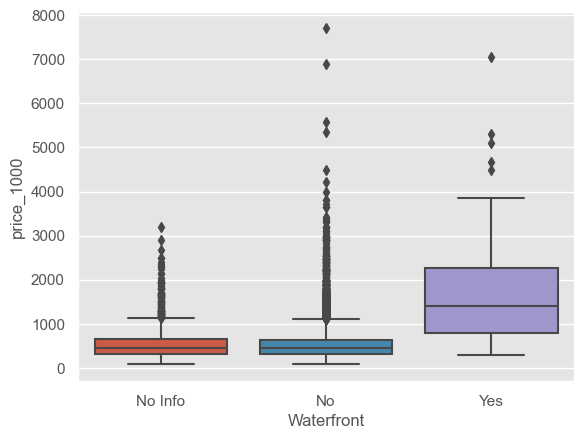

In [544]:
# boxplot to compare prices for houses (not) at waterfront 
sns.boxplot(data= df_brutto, x="Waterfront", y="price_1000")

To plot the mean price of a house in the data set, I grouped the data by waterfront or not (without missing). In a small crosstable there are further infos about descriptives in regard to the group.

Text(0, 0.5, "Price in 1000's $US")

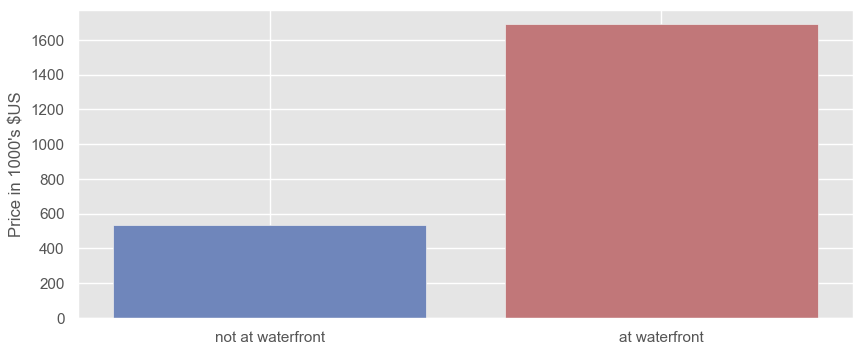

In [545]:
# Group for Job and Mean of Salary
df = df_brutto.groupby(['waterfront_copy']).mean('price').reset_index()

# Choose Style
plt.style.use('ggplot')

# Set figure size
plt.figure(figsize=(10, 4))

# Create Barchart
color = ['#6f86bb', '#c17779']
plt.bar(df['waterfront_copy'], df['price_1000'], color=color)

# X Axis ticks
plt.xticks([0,1], ["not at waterfront", "at waterfront"]) # rotation=20 for rotated labels

# Y Axis Label
plt.ylabel("Price in 1000's $US")

# Set title
#plt.title("Average Price differentiated by waterfront")

In [546]:
# Find houses at waterfront in the lower 25%
df_wf = df_brutto.groupby('waterfront_copy')
df_wf['price_1000'].describe().round(2)
# price lower 25%: Between 285 and 827.5 in 1000's $US

count     mean      std    min    25%     50%     75%  \
waterfront_copy                                                            
0.0              19060.0   532.77   344.92   78.0  320.0   450.0   639.0   
1.0                155.0  1688.74  1133.82  285.0  795.0  1410.0  2265.0   

                    max  
waterfront_copy          
0.0              7700.0  
1.0              7060.0

To meet all the wishes of the costumer, I reduced and produced some data frames containing only the necessary cases.
1. only houses at waterfront
2. only houses at waterfront, lower than the 1. Quartile
3. only houses at waterfront, lower than the 1. Quartile and at least 3 bedrooms

In [547]:
# creating a data frame with only waterfront houses
df_wf = df_brutto[df_brutto.waterfront_copy > 0]
df_wf.shape # 146 rows

# creating a data frame from only waterfront houses for a low budget (lowest 25%)
lowest_quartile_wf = df_wf.price < df_wf.price.quantile(.25)
df_wf_lq = df_wf[lowest_quartile_wf == True]

# Descriptives of df with waterfront houses for lowest budget
df_wf_lq.describe()
df_wf_lq.shape # 37 rows
df_wf_lq.head(37)

# creating a data frame from only waterfront houses for a low budget (lowest 25%) + min. 3 bedrooms (because of kids)
df_wf_lq_3b = df_wf_lq[df_wf_lq.bedrooms >= 3]

df_wf_lq_3b.describe()
df_wf_lq_3b.shape # 20 rows
df_wf_lq_3b.head(20)

date     price    house_id  bedrooms  bathrooms  sqft_living  \
457   2014-11-26  705000.0  2122039094       3.0       3.00       1970.0   
1155  2014-12-29  790000.0  8069000075       4.0       1.75       2460.0   
5929  2014-06-26  663000.0  5215200010       3.0       2.50       2480.0   
8270  2015-04-28  400000.0   221029019       3.0       2.50       2090.0   
9076  2015-01-16  650000.0  3222049055       3.0       1.75       2800.0   
9845  2015-02-06  629000.0   121039083       3.0       1.75       1460.0   
10327 2015-03-25  680000.0  3577000116       4.0       1.00       2200.0   
11155 2015-01-27  750000.0  7567600030       5.0       1.75       2640.0   
11544 2014-09-11  357000.0  2013802030       3.0       2.00       2460.0   
11832 2015-02-18  770000.0  2623039082       3.0       3.50       2050.0   
13225 2014-10-27  685000.0  2623039018       4.0       1.00       1550.0   
13564 2014-12-16  635000.0  2623029003       3.0       1.75       1940.0   
13953 2014-09-05  649000.0  6102400166       3.0       2.00       1810.0   
15316 2014-12-23  520000.0  9536600010       4.0       0.75       1960.0   
15811 2014-12-11  700000.0  8073000491       4.0       1.75       1950.0   
16404 2014-07-29  750000.0  6329000190       4.0       1.75       2520.0   
16556 2014-11-13  340000.0  2923039243       4.0       1.00       1200.0   
17138 2014-07-29  750000.0  5215200050       3.0       2.50       2960.0   
17460 2015-03-29  540000.0  6329000185       3.0       2.50       2600.0   
18833 2014-09-18  380000.0  7631800110       3.0       2.50       1980.0   

       sqft_lot  floors  view  condition  ...  yr_built  yr_renovated  \
457     20978.0     2.0   3.0          4  ...      1980           0.0   
1155    10061.0     1.0   4.0          3  ...      1961           0.0   
5929    37843.0     1.5   3.0          4  ...      1974           NaN   
8270    32718.0     2.0   4.0          3  ...      1919           NaN   
9076    19386.0     1.0   4.0          3  ...      1965           0.0   
9845    12367.0     2.0   4.0          4  ...      1970           0.0   
10327   12137.0     1.0   4.0          4  ...      1956           0.0   
11155   13290.0     1.0   4.0          4  ...      1954           0.0   
11544   53882.0     1.0   4.0          3  ...      1955           0.0   
11832   21744.0     2.0   4.0          4  ...      1930           0.0   
13225   15239.0     1.5   4.0          3  ...      1930           NaN   
13564  167125.0     1.0   1.0          4  ...      1955           0.0   
13953   17006.0     2.0   4.0          3  ...      1913       19870.0   
15316    8277.0     1.0   4.0          4  ...      1923       19860.0   
15811    7139.0     1.0   4.0          3  ...      1957           0.0   
16404   21834.0     1.0   4.0          3  ...      1960           0.0   
16556   11834.0     1.0   3.0          3  ...      1972           0.0   
17138   69351.0     2.0   3.0          4  ...      1990           0.0   
17460   23361.0     1.5   4.0          3  ...      1912           0.0   
18833   17342.0     2.0   4.0          3  ...      1984           0.0   

       zipcode      lat     long  sqft_living15  sqft_lot15  price_1000  \
457      98070  47.3844 -122.438         2280.0     75396.0       705.0   
1155     98178  47.5105 -122.238         2300.0     10061.0       790.0   
5929     98070  47.4003 -122.422         2350.0     42122.0       663.0   
8270     98070  47.3338 -122.511         1200.0    192268.0       400.0   
9076     98198  47.3554 -122.324         3270.0     31450.0       650.0   
9845     98023  47.3311 -122.375         1970.0     18893.0       629.0   
10327    98028  47.7473 -122.261         3250.0     17153.0       680.0   
11155    98178  47.5022 -122.223         2400.0     11942.0       750.0   
11544    98198  47.3811 -122.325         2660.0     32625.0       357.0   
11832    98166  47.4536 -122.376         2300.0     12200.0       770.0   
13225    98166  47.4502 -122.378         1790.0     2204

To compare results via plotting, I also generated a data frame, which only contains houses which are clearly not at the waterfront (missing values are also not included).

In [548]:
# creating a data frame with only NOT waterfront houses
df_nowf = df_brutto[df_brutto.waterfront_copy == 0]
df_nowf.shape # 19060 rows

(19060, 23)

To check on the distribution in the data set and also to confirm that Waterfront houses are more explensive, I created a density plots. The second one is only for presentational purpose and highlight the density of houses at waterfront to focus on our interest.

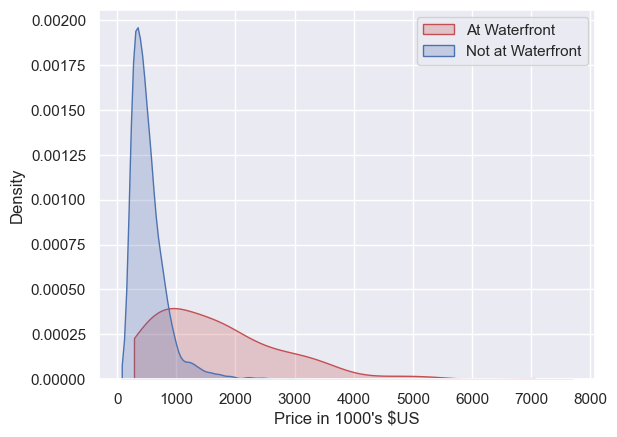

In [549]:
# Density waterfront (red) vs. not waterfront (blue)
sns.set_theme(style="darkgrid")
fig = sns.kdeplot(data=df_wf, x="price_1000", fill=True, color="r", cut=0, label='At Waterfront')
fig =sns.kdeplot(data=df_nowf, x="price_1000", fill=True, color="b", cut=0, label='Not at Waterfront')
fig.legend(loc="upper right")
#fig.figure.suptitle("Density of Price for houses (not) at waterfront")
plt.xlabel("Price in 1000's $US")
plt.ylabel('Density')
plt.show()

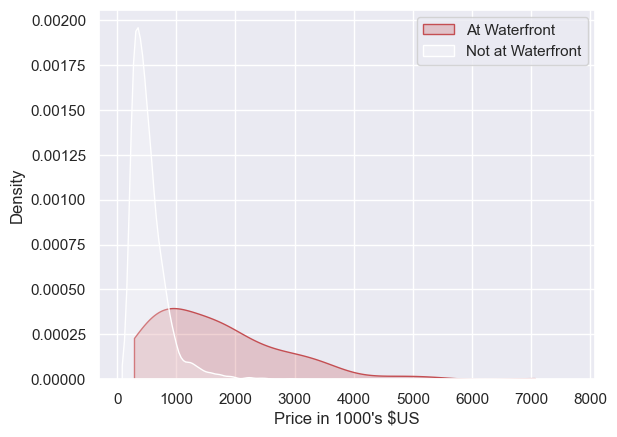

In [550]:
# Density waterfront (red) vs. not waterfront (blue)
sns.set_theme(style="darkgrid")
fig = sns.kdeplot(data=df_wf, x="price_1000", fill=True, color="r", cut=0, label='At Waterfront')
fig =sns.kdeplot(data=df_nowf, x="price_1000", fill=True, color="w", cut=0, label='Not at Waterfront')
fig.legend(loc="upper right")
#fig.figure.suptitle("Density of Price for houses (not) at waterfront")
plt.xlabel("Price in 1000's $US")
plt.ylabel('Density')
plt.show()

For some plots I need to drop all the missing cases for waterfront, so I created a new string variable called "Waterfront_yn".

In [551]:
#df_brutto["Waterfront_yn"] = df_brutto[df_brutto.Waterfront != df_brutto.waterfront_copy.isna()]
df_brutto['Waterfront_yn'] = df_brutto.apply(lambda x: wf_dict.get(x['waterfront_copy']), axis=1)
df_brutto.head()

date     price    house_id  bedrooms  bathrooms  sqft_living  \
0 2014-10-13  221900.0  7129300520       3.0       1.00       1180.0   
1 2014-12-09  538000.0  6414100192       3.0       2.25       2570.0   
2 2015-02-25  180000.0  5631500400       2.0       1.00        770.0   
3 2014-12-09  604000.0  2487200875       4.0       3.00       1960.0   
4 2015-02-18  510000.0  1954400510       3.0       2.00       1680.0   

   sqft_lot  floors  view  condition  ...  yr_renovated  zipcode      lat  \
0    5650.0     1.0   0.0          3  ...           0.0    98178  47.5112   
1    7242.0     2.0   0.0          3  ...       19910.0    98125  47.7210   
2   10000.0     1.0   0.0          3  ...           NaN    98028  47.7379   
3    5000.0     1.0   0.0          5  ...           0.0    98136  47.5208   
4    8080.0     1.0   0.0          3  ...           0.0    98074  47.6168   

      long  sqft_living15  sqft_lot15  price_1000  waterfront_copy  \
0 -122.257         1340.0      5650.0       221.9              NaN   
1 -122.319         1690.0      7639.0       538.0              0.0   
2 -122.233         2720.0      8062.0       180.0              0.0   
3 -122.393         1360.0      5000.0       604.0              0.0   
4 -122.045         1800.0      7503.0       510.0              0.0   

   Waterfront  Waterfront_yn  
0     No Info           None  
1          No             No  
2          No             No  
3          No             No  
4          No             No  

[5 rows x 24 columns]

A Geo overview now shows us just houses on the map, which are: at waterfront, low budget (.25 quartile) and have 3 or more bedrooms. Already some of the requirements our customer was looking for.

In [552]:
# Street map of houses at waterfront, low budget (.25 quartile) and 3 or more bedrooms
fig = px.scatter_mapbox(df_wf_lq_3b, 
                        lat="lat", 
                        lon="long", 
                        zoom=9, 
                        width=1000, 
                        height=700, 
                        hover_data="price")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":10,"t":10,"l":10,"b":10})
fig.show()

Since we have now a great overview of houses at the waterfront, for a low budget (relatively) and with a minimum of 3 bedrooms (for the kids), we should check for the neighborhood. To keep distance and be isolated, we can assume that you will have more of your own peace if the neighborhoods Lots are bigger than the average. Also we can assume, that your own lot has a bigger terrain, if your neighbors have.

In [553]:
# Check square footage of neighborhood around houses (not) at waterfront
df_wf = df_brutto.groupby('waterfront_copy')
df_wf['sqft_lot15'].describe().round(2)

count      mean       std     min      25%      50%  \
waterfront_copy                                                          
0.0              19060.0  12743.99  27632.28   651.0   5100.0   7600.0   
1.0                155.0  22534.68  22779.40  3230.0  11945.5  16560.0   

                      75%       max  
waterfront_copy                      
0.0              10034.25  871200.0  
1.0              24456.00  192268.0

To make it easier to read and interpret the plot, we divide the house lot and the ones of the neighbors, we divide the square feats by 1000. As we did for the price, we just eliminate the last three 0 digits.

In [554]:
# Add Variables Footage in 1000'set
df_brutto['sqft_lot_1000'] = df_brutto['sqft_lot']/1000
df_brutto['sqft_lot15_1000'] = df_brutto['sqft_lot15']/1000

To compare the own Lot and the ones of close neighbors between waterfront houses and other, I provide a scatter plot.

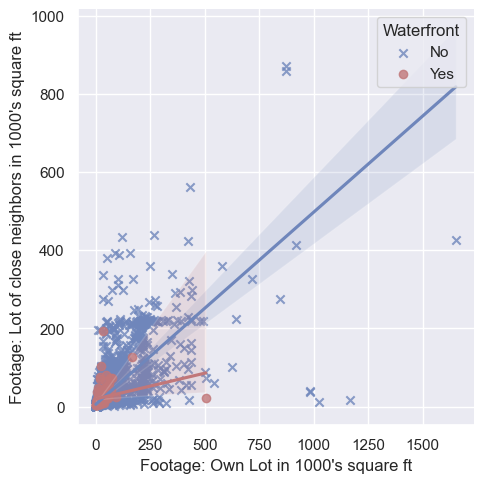

In [555]:
# give a list to the marker argument
fig = sns.lmplot(x="sqft_lot_1000", 
                  y="sqft_lot15_1000", 
                  data=df_brutto, 
                  fit_reg=True, 
                  hue='Waterfront_yn', 
                  legend=False, 
                  markers=["x", "o"], 
                  palette=dict(No="#6f86bb", Yes="#c17779"))

fig.set(xlabel = "Footage: Own Lot in 1000's square ft", ylabel = "Footage: Lot of close neighbors in 1000's square ft")
# Move the legend to an empty part of the plot
plt.legend(loc='upper right', title="Waterfront")

plt.show()

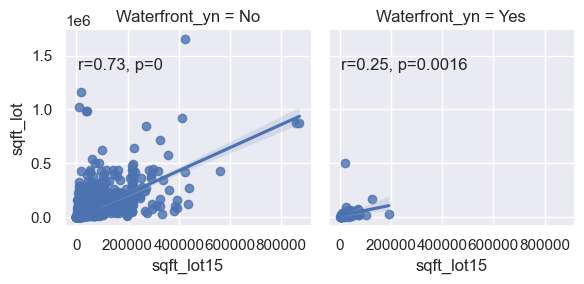

In [556]:
g = sns.lmplot(x="sqft_lot15", y="sqft_lot", data=df_brutto, col='Waterfront_yn', height=3, aspect=1)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['sqft_lot15'], data['sqft_lot'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
plt.show()

In [557]:
# Correlation between Own and the Size of 15 Neighbors Lots
df_brutto.sqft_lot.corr(df_brutto.sqft_lot15) # r= 0.71

0.7182040308060949

So there is a strong corrleation between the own lot size and the one of the closest 15 neighbors, BUT not if your house is at the waterfront.

To differ between Seasons, I created via day count 4 bins for Summer, Fall, Winter, Spring.

In [558]:
#s = pd.Series(df_brutto["date"])
#s = pd.to_datetime(s)
#s.dt.dayofyear

# Convert Date to the specific day of year (count)
idx = pd.DatetimeIndex(df_brutto["date"])
idx.dayofyear

# Seasons: Create Bins with the 4 Seasons Summer, Fall, Winter and Spring
bins = [0, 91, 183, 275, 366]
labels=['Winter', 'Spring', 'Summer', 'Fall']
doy = idx.dayofyear
df_brutto['season'] = pd.cut(doy + 11 - 366*(doy > 355), bins=bins, labels=labels)

df_brutto.head()

# spring = range(80, 172)
# summer = range(172, 264)
# all = range(264, 355)


date     price    house_id  bedrooms  bathrooms  sqft_living  \
0 2014-10-13  221900.0  7129300520       3.0       1.00       1180.0   
1 2014-12-09  538000.0  6414100192       3.0       2.25       2570.0   
2 2015-02-25  180000.0  5631500400       2.0       1.00        770.0   
3 2014-12-09  604000.0  2487200875       4.0       3.00       1960.0   
4 2015-02-18  510000.0  1954400510       3.0       2.00       1680.0   

   sqft_lot  floors  view  condition  ...     long  sqft_living15  sqft_lot15  \
0    5650.0     1.0   0.0          3  ... -122.257         1340.0      5650.0   
1    7242.0     2.0   0.0          3  ... -122.319         1690.0      7639.0   
2   10000.0     1.0   0.0          3  ... -122.233         2720.0      8062.0   
3    5000.0     1.0   0.0          5  ... -122.393         1360.0      5000.0   
4    8080.0     1.0   0.0          3  ... -122.045         1800.0      7503.0   

   price_1000  waterfront_copy  Waterfront  Waterfront_yn  sqft_lot_1000  \
0       221.9              NaN     No Info           None          5.650   
1       538.0              0.0          No             No          7.242   
2       180.0              0.0          No             No         10.000   
3       604.0              0.0          No             No          5.000   
4       510.0              0.0          No             No          8.080   

   sqft_lot15_1000  season  
0            5.650    Fall  
1            7.639    Fall  
2            8.062  Winter  
3            5.000    Fall  
4            7.503  Winter  

[5 rows x 27 columns]

In [559]:
# Create Seasonal data frames
df_summer = df_brutto[df_brutto.season == "Summer"]
df_fall = df_brutto[df_brutto.season == "Fall"]
df_winter = df_brutto[df_brutto.season == "Winter"]
df_spring = df_brutto[df_brutto.season == "Spring"]

To get a first insight, I show descriptives for the 4 seasons.

In [560]:
# Descriptives for the price by season
df_wf = df_brutto.groupby('season')
df_wf['price_1000'].describe().round(2)

count    mean     std   min     25%    50%     75%     max
season                                                             
Winter  3738.0  522.08  347.26  85.0  311.12  435.0  616.64  3570.0
Spring  6811.0  558.41  377.61  78.0  333.00  470.0  660.00  7060.0
Summer  6037.0  539.94  362.89  85.0  325.00  450.0  650.00  6890.0
Fall    5011.0  529.70  372.18  82.0  315.00  438.9  630.00  7700.0

To check for the share of how many houses are sold per season, I calculated by count the percentage.

In [561]:
# Percentage of sold houses by season
print(f"numbers of rows : {df_brutto.shape[0]}")
print(f"Houses sold in Summer : {round(df_summer.price.count()/df_brutto.shape[0]*100,0)} %")
print(f"Houses sold in Fall : {round(df_fall.price.count()/df_brutto.shape[0]*100,0)} %")
print(f"Houses sold in Winter : {round(df_winter.price.count()/df_brutto.shape[0]*100,0)} %")
print(f"Houses sold in Spring : {round(df_spring.price.count()/df_brutto.shape[0]*100,0)} %")

numbers of rows : 21597
Houses sold in Summer : 28.0 %
Houses sold in Fall : 23.0 %
Houses sold in Winter : 17.0 %
Houses sold in Spring : 32.0 %


To display the average price by season, I used a bar plot. To highlight that the price is a little lower in winter and fall, I marked them in red.

Text(0, 0.5, "Average Price in 1000's $US")

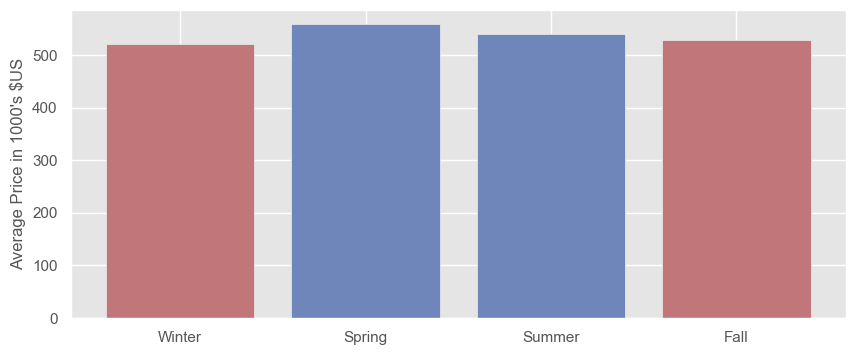

In [562]:
# Group for Job and Mean of Salary
df = df_brutto.groupby(['season']).mean('price').reset_index()

# Choose Style
plt.style.use('ggplot')

# Set figure size
plt.figure(figsize=(10, 4))

# Create Barchart
color = ["#c17779", "#6f86bb", "#6f86bb", "#c17779"]
plt.bar(df['season'], df['price_1000'], color=color)

# X Axis ticks
#plt.xticks([0,1], ["summer", "at waterfront"]) # rotation=20 for rotated labels

# Y Axis Label
plt.ylabel("Average Price in 1000's $US")

To just focus on the cheapest 25% of properties (and also get rid of extreme outliers at the upper end), I generated a dataset and bar plot for that.

In [563]:
# creating a data frame from only houses for a low budget (lowest 25%)
lowest_quartile = df_brutto.price < df_brutto.price.quantile(.25)
df_brutto_lq = df_brutto[lowest_quartile == True]

df_brutto_lq.describe()

date          price      house_id  \
count                           5394    5394.000000  5.394000e+03   
mean   2014-10-29 12:42:42.847608576  251613.754171  4.537920e+09   
min              2014-05-02 00:00:00   78000.000000  1.000102e+06   
25%              2014-07-25 00:00:00  220000.000000  2.025701e+09   
50%              2014-10-21 00:00:00  259000.000000  3.832711e+09   
75%              2015-02-09 18:00:00  290000.000000  7.334501e+09   
max              2015-05-14 00:00:00  321950.000000  9.900000e+09   
std                              NaN   48191.867730  2.854481e+09   

          bedrooms    bathrooms  sqft_living      sqft_lot       floors  \
count  5394.000000  5394.000000  5394.000000  5.394000e+03  5394.000000   
mean      3.035224     1.663839  1466.158509  1.042230e+04     1.274842   
min       1.000000     0.500000   370.000000  5.720000e+02     1.000000   
25%       3.000000     1.000000  1110.000000  6.000000e+03     1.000000   
50%       3.000000     1.750000  1420.000000  7.777000e+03     1.000000   
75%       3.000000     2.250000  1780.000000  9.720000e+03     1.500000   
max       7.000000     5.250000  3490.000000  1.164794e+06     3.000000   
std       0.800207     0.614661   470.562391  2.336470e+04     0.449735   

              view    condition  ...  yr_renovated       zipcode          lat  \
count  5378.000000  5394.000000  ...   4433.000000   5394.000000  5394.000000   
mean      0.039420     3.411568  ...    489.496955  98075.359659    47.440324   
min       0.000000     1.000000  ...      0.000000  98001.000000    47.176400   
25%       0.000000     3.000000  ...      0.000000  98027.000000    47.340525   
50%       0.000000     3.000000  ...      0.000000  98055.000000    47.423850   
75%       0.000000     4.000000  ...      0.000000  98126.000000    47.508000   
max       4.000000     5.000000  ...  20150.000000  98198.000000    47.777500   
std       0.292375     0.661561  ...   3083.525258     60.956862     0.132033   

              long  sqft_living15     sqft_lot15   price_1000  \
count  5394.000000    5394.000000    5394.000000  5394.000000   
mean   -122.225938    1555.640341    9771.700593   251.613754   
min    -122.512000     460.000000     651.000000    78.000000   
25%    -122.323000    1280.000000    6120.000000   220.000000   
50%    -122.264000    1520.000000    7802.500000   259.000000   
75%    -122.170000    1790.000000    9440.000000   290.000000   
max    -121.315000    3557.000000  392040.000000   321.950000   
std       0.132682     384.697179   16498.119475    48.191868   

       waterfront_copy  sqft_lot_1000  sqft_lot15_1000  
count      4791.000000    5394.000000      5394.000000  
mean          0.000417      10.422300         9.771701  
min           0.000000       0.572000         0.651000  
25%           0.000000       6.000000         6.120000  
50%           0.000000       7.777000         7.802500  
75%           0.000000       9.720000         9.440000  
max           1.000000    1164.794000       392.040000  
std           0.020429      23.364696        16.498119  

[8 rows x 24 columns]

Text(0, 0.5, "Average Price in 1000's $US")

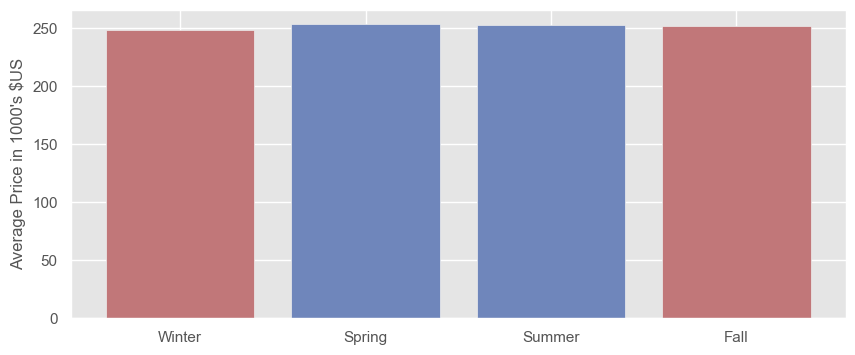

In [564]:
# Group for Job and Mean of Salary
df = df_brutto_lq.groupby(['season']).mean('price').reset_index()

# Choose Style
plt.style.use('ggplot')

# Set figure size
plt.figure(figsize=(10, 4))

# Create Barchart
color = ["#c17779", "#6f86bb", "#6f86bb", "#c17779"]
plt.bar(df['season'], df['price_1000'], color=color)

# X Axis ticks
#plt.xticks([0,1], ["summer", "at waterfront"]) # rotation=20 for rotated labels

# Y Axis Label
plt.ylabel("Average Price in 1000's $US")

<Axes: xlabel='season', ylabel='price_1000'>

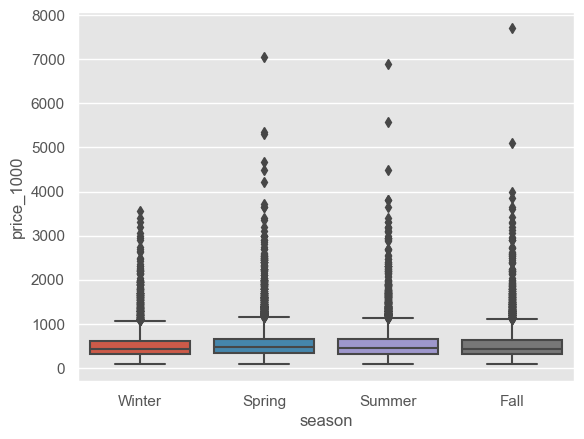

In [565]:
# Boxplots: Check for price differences between seasons
sns.boxplot( x=df_brutto["season"], y=df_brutto["price_1000"])

The differences between the seasons are fairly small. It is not fully possible to confirm on cheaper or more expensive seasons with the given data. 